In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers.advanced_activations import ReLU, PReLU
from keras.optimizers import SGD, Adam
from scipy.stats import mode

In [2]:
train_x = pd.read_csv('train_x_p_stack.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('test_x_p_stack.csv')

In [3]:
train_x_nn = pd.read_csv('train_x_nn_stack.csv')
train_y_nn = pd.read_csv('.//dataset//train_y_NN.csv')
test_x_nn = pd.read_csv('test_x_nn_stack.csv')

In [5]:
from models import Model1xgb,Model1xgb2, Model1NNproba,Model1NN2proba,Model1ramdom,Model2KMeans,Model2KNN,Model3logistic

In [6]:
def predict_cv_classfier(model,train_x, train_y, test_x):
    

    preds = []
    preds_test = []
    va_idxes = []


    kf = KFold(n_splits=4, shuffle=True, random_state= 71)
    for i , (tr_idx, va_idx) in enumerate (kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    tmp = np.stack(preds_test, axis =1)
    mode_test, mode_counts = mode(tmp, axis=1)

    preds_test = mode_test
    preds_size = preds_test.shape[0]
    preds_test = preds_test.reshape(preds_size,)
    
    return pred_train, preds_test

In [7]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []
    
    kf = KFold(n_splits=4, shuffle=True, random_state=71)
    for i , (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)
        
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]
    
    preds_test = np.mean(preds_test, axis=0)
    
    return pred_train, preds_test

# 全てのモデルを使用してpoutcomeをスタッキング

In [8]:
model1_a = Model2KNN()
pred_train_1a , preds_test_1a = predict_cv_classfier(model1_a, train_x, train_y, test_x)

model1_b = Model2KMeans()
pred_train_1b, preds_test_1b = predict_cv_classfier(model1_b, train_x, train_y, test_x)

print(f'logloss: {log_loss(train_y, pred_train_1a, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1b, eps=1e-7):.4f}')

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:425: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:425: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:425: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:425: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.model.fit(tr_x, tr_y)


logloss: 1.2431
logloss: 5.3214


In [9]:
model_1c = Model1xgb()
pred_train_1c, pred_test_1c = predict_cv(model_1c, train_x, train_y, test_x)

model_1d = Model1NNproba()
pred_train_1d, pred_test_1d = predict_cv(model_1d, train_x_nn, train_y, test_x_nn)


model_1e = Model1ramdom()
pred_train_1e, pred_test_1e = predict_cv(model_1e, train_x, train_y, test_x)


model_1f = Model1xgb2()
pred_train_1f, pred_test_1f = predict_cv(model_1f, train_x, train_y, test_x)

model_1g = Model1NN2proba()
pred_train_1g, pred_test_1g = predict_cv(model_1e, train_x_nn, train_y, test_x_nn)


[14:11:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.07173	eval-error:0.07321
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.07183	eval-error:0.07233
[2]	train-error:0.07159	eval-error:0.07262
[3]	train-error:0.07124	eval-error:0.07188
[4]	train-error:0.07095	eval-error:0.07203
[5]	train-error:0.07036	eval-error:0.07203
[6]	train-error:0.07026	eval-error:0.07291
[7]	train-error:0.06972	eval-error:0.07218
[8]	train-error:0.06982	eval-error:0.07203
[9]	train-error:0.07011	eval-error:0.07218
[10]	train-error:0.06977	eval-error:0.072

[7]	train-error:0.06662	eval-error:0.08236
[8]	train-error:0.06657	eval-error:0.08207
[9]	train-error:0.06622	eval-error:0.08177
[10]	train-error:0.06647	eval-error:0.08118
[11]	train-error:0.06642	eval-error:0.08103
[12]	train-error:0.06608	eval-error:0.08148
[13]	train-error:0.06642	eval-error:0.08103
[14]	train-error:0.06632	eval-error:0.08118
[15]	train-error:0.06613	eval-error:0.08103
[16]	train-error:0.06578	eval-error:0.08074
[17]	train-error:0.06593	eval-error:0.08089
[18]	train-error:0.06583	eval-error:0.08059
[19]	train-error:0.06558	eval-error:0.08044
[20]	train-error:0.06563	eval-error:0.08059
[21]	train-error:0.06563	eval-error:0.08030
[22]	train-error:0.06549	eval-error:0.08030
[23]	train-error:0.06549	eval-error:0.08015
[24]	train-error:0.06529	eval-error:0.08015
[25]	train-error:0.06514	eval-error:0.08044
[26]	train-error:0.06514	eval-error:0.08015
[27]	train-error:0.06499	eval-error:0.08044
[28]	train-error:0.06475	eval-error:0.08000
[29]	train-error:0.06470	eval-error

Epoch 21/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1625 - accuracy: 0.9420 - val_loss: 0.2271 - val_accuracy: 0.9308
Epoch 22/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9442 - val_loss: 0.2301 - val_accuracy: 0.9300
Epoch 23/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1545 - accuracy: 0.9462 - val_loss: 0.2303 - val_accuracy: 0.9289
Epoch 24/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1538 - accuracy: 0.9449 - val_loss: 0.2318 - val_accuracy: 0.9272
Instructions for updating:
Please use `model.predict()` instead.
Epoch 1/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2425 - accuracy: 0.9259 - val_loss: 0.2136 - val_accuracy: 0.9302
Epoch 2/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2129 - accuracy: 0.9309 - val_loss: 0.2143 - val_accuracy: 0.9306
Epoch 3/100
159/159 [==============================] - 1s 4ms/step - loss

159/159 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9367 - val_loss: 0.2243 - val_accuracy: 0.9241
Epoch 11/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1859 - accuracy: 0.9378 - val_loss: 0.2251 - val_accuracy: 0.9256
Epoch 12/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1858 - accuracy: 0.9385 - val_loss: 0.2244 - val_accuracy: 0.9255
Epoch 13/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1806 - accuracy: 0.9386 - val_loss: 0.2257 - val_accuracy: 0.9244
Epoch 14/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1804 - accuracy: 0.9397 - val_loss: 0.2287 - val_accuracy: 0.9241
Epoch 15/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1758 - accuracy: 0.9399 - val_loss: 0.2279 - val_accuracy: 0.9230
Epoch 16/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1726 - accuracy: 0.9407 - val_loss: 0.2309 - val_accuracy: 0.9238
Epoch

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)


[14:13:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.07444	eval-error:0.07291
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.07316	eval-error:0.07144
[2]	train-error:0.07228	eval-error:0.07188
[3]	train-error:0.07233	eval-error:0.07085
[4]	train-error:0.07218	eval-error:0.07144
[5]	train-error:0.07183	eval-error:0.07055
[6]	train-error:0.07183	eval-error:0.07129
[7]	train-error:0.07164	eval-error:0.07100
[8]	train-error:0.07139	eval-error:0.07085
[9]	train-error:0.07149	eval-error:0.07055
[10]	train-error:0.07110	eval-error:0.070

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)


In [10]:
print(f'logloss: {log_loss(train_y, pred_train_1c, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1d, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1e, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1f, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1g, eps=1e-7):.4f}')

logloss: 0.2228
logloss: 0.2124
logloss: 0.2540
logloss: 0.2337
logloss: 0.2504


In [11]:
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b, 'pred_1c':pred_train_1c,'pred_1d':pred_train_1d, 'pred_1e':pred_train_1e, 'pred_1f': pred_train_1f,'pred_1g':pred_train_1g})
test_x_2 = pd.DataFrame({'pred_1a': preds_test_1a, 'pred_1b': preds_test_1b, 'pred_1c': pred_test_1c,'pred_1d':pred_test_1d, 'pred_1e':pred_test_1e, 'pred_1f': pred_test_1f,'pred_1g':pred_test_1g})

In [12]:
model_2 = Model3logistic()
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, train_y, test_x_2)
print(f'logloss: {log_loss(train_y, pred_train_2, eps=1e-7):.4f}')

logloss: 0.2082


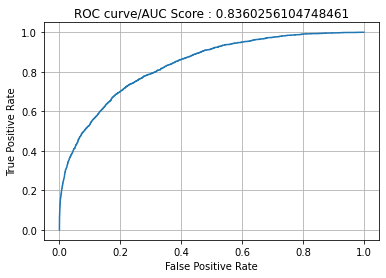

In [13]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred_train_2)
auc_score = roc_auc_score(train_y,pred_train_2)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [14]:
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
id = test['id']
pred = pd.DataFrame(pred_test_2)
submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.290992
1,1,0.061828
2,2,0.056431
3,3,0.005454
4,4,0.131610
...,...,...
18045,18045,0.022972
18046,18046,0.007998
18047,18047,0.072315
18048,18048,0.013321


In [15]:
submit.to_csv('stack7.csv',index=False,header=False)